# クラスタリングしてみる
---
word2vec -> clustering -> t-SNE の流れでクラスタを確認してみる。

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from gensim.models import word2vec
from sklearn.manifold import TSNE

plt.rcParams['font.family'] = 'Osaka'

### 前処理として、word2vec -> t-SNE 

In [56]:
data = word2vec.Text8Corpus("basket.txt")
model = word2vec.Word2Vec(data, size=50)

categorys = np.array(list(model.vocab.keys()))
X = np.vstack([model[categorys[c]] for c in range(len(categorys))])

model2 = TSNE(n_components=2)
Z = model2.fit_transform(X)

### とりあえずk-means (k=25)

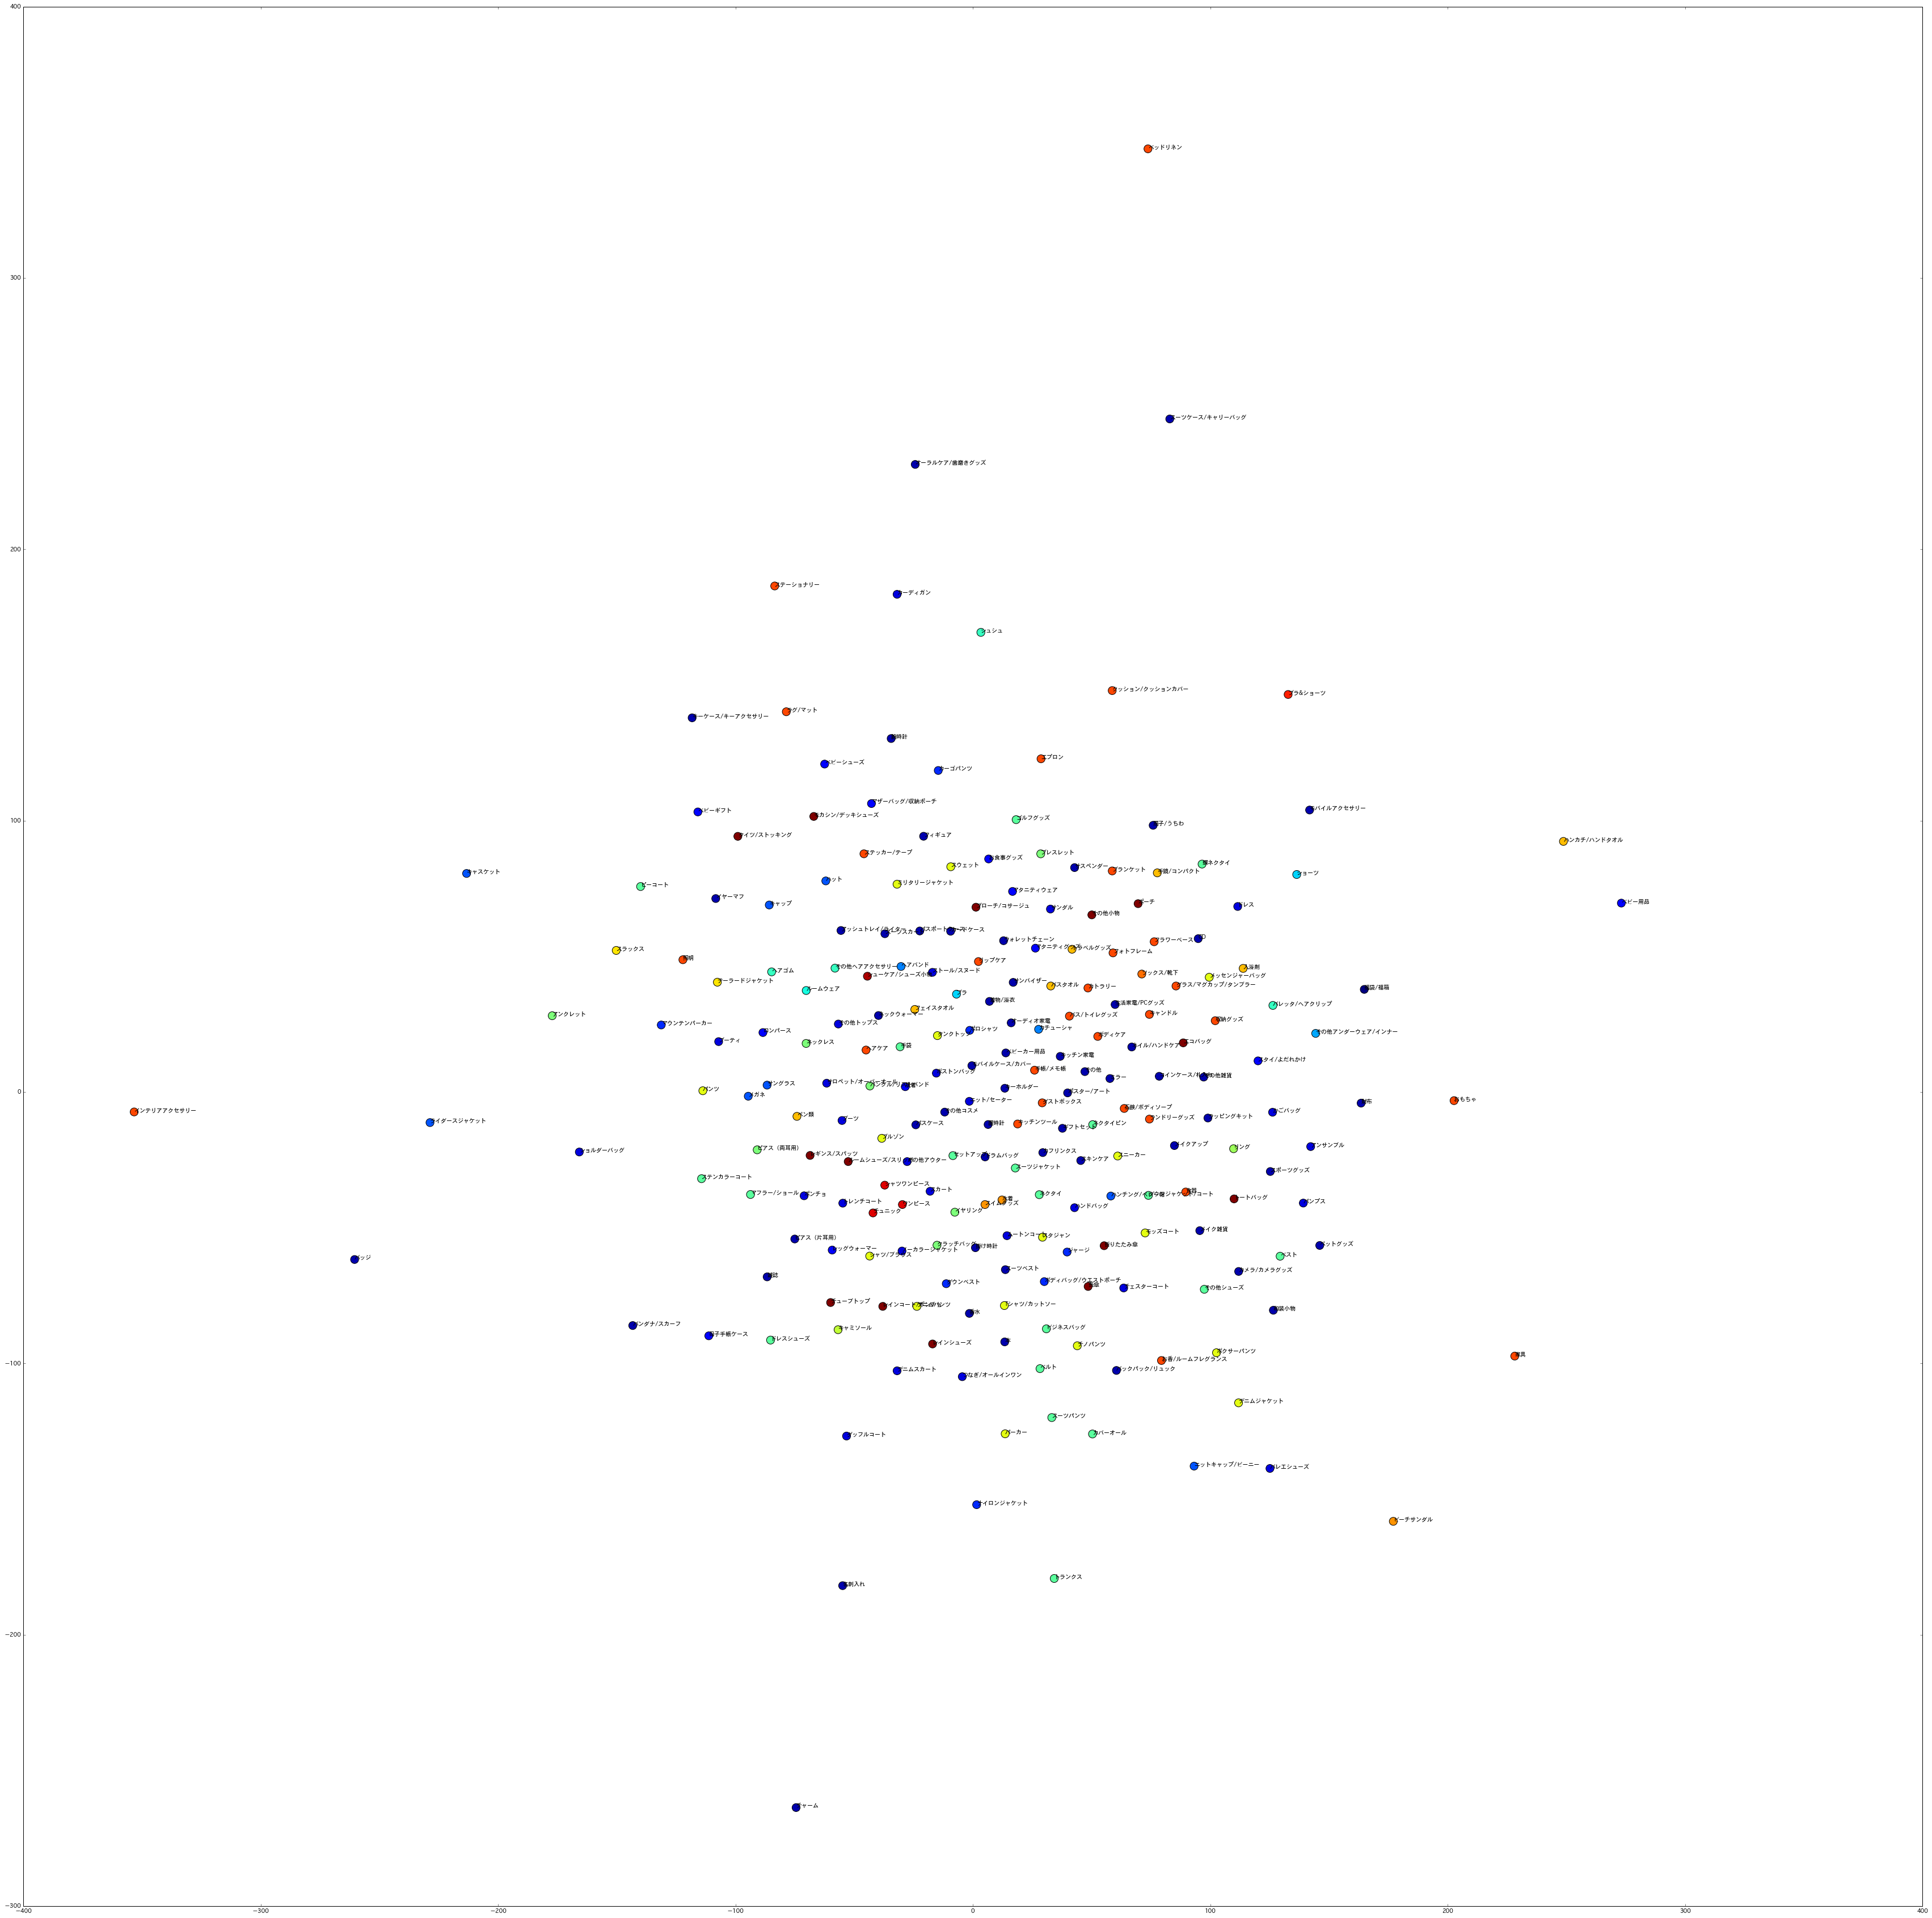

In [57]:
from sklearn.cluster import KMeans

K = 25 
model3 = KMeans(n_clusters=K).fit(X)
labels = model3.labels_

fig = plt.figure(figsize=(60, 60))
plt.scatter(Z[:,0], Z[:,1], s=200, c=labels)
for i in range(len(categorys)):
    x = Z[i, 0]
    y = Z[i, 1]
    plt.text(x, y, categorys[i])

In [58]:
for k in range(K):
    cluster = categorys[labels == k]
    print("\n----------------------------------\ncluster%d\n" %k)
    for c in cluster:
        print(c)


----------------------------------
cluster0

福袋/福箱

----------------------------------
cluster1

カメラ/カメラグッズ
その他
サンバイザー
オーディオ家電
名刺入れ
サスペンダー
スーツベスト
キッチン家電
バッジ
アッシュトレイ/ライター
ギフトセット
置時計
パスケース
扇子/うちわ
ピアス（片耳用）
バンダナ/スカーフ
キーケース/キーアクセサリー
スーツケース/キャリーバッグ
バックパック/リュック
キーホルダー
スポーツグッズ
掛け時計
ベビーカー用品
生活家電/PCグッズ
スキンケア
オーラルケア/歯磨きグッズ
ドラムバッグ
ネックウォーマー
ペットグッズ
ウォレットチェーン
ポスター/アート
イヤーマフ
カフリンクス
パスポートケース
その他コスメ
フィギュア
チャーム
メイク雑貨
ラッピングキット
腕時計
香水
雑誌
モバイルアクセサリー
モバイルケース/カバー
メイクアップ
和装小物
ミラー
財布
スーツスカート
カードケース
その他雑貨
本
CD
着物/浴衣
ネイル/ハンドケア
コインケース/札入れ

----------------------------------
cluster2

スカート
ボストンバッグ
パンプス
ブーツ
バレエシューズ
ポンチョ
つなぎ/オールインワン
アンサンブル
ハンドバッグ
トレンチコート
ドレス
ムートンコート
ストール/スヌード
その他アウター
かごバッグ
その他トップス
デニムスカート
カーディガン
ブーティ
サンダル
ノーカラージャケット
チェスターコート
ダッフルコート
ショルダーバッグ
ニット/セーター
サロペット/オーバーオール

----------------------------------
cluster3

肌着
マザーバッグ/収納ポーチ
お食事グッズ
ロンパース
レッグウォーマー
ベビーギフト
ベビー用品
マタニティグッズ
マタニティウェア
ベビーシューズ
母子手帳ケース
スタイ/よだれかけ

----------------------------------
cluster4

ジャージ
ナイロンジャケット
マウンテンパーカー
ボディバッグ/ウエストポーチ
ポロシャツ
カーゴパンツ

うまく分かれているクラスターもある（cluster8とか)けど、全体的にひどい。  
ユークリッド距離は適してないのかも。（word2vecは類似度をコサイン類似度で測っている）  
  
それからt-SNEがあまりうまくいってないようなきがする。

### x-meansでリベンジ

In [59]:
import x_means

model4 = x_means.XMeans().fit(X)

/Users/TakayukiYagi/Developer/M1/competition/DataComp/Yagi/word2vec/x_means.py:73: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if index == None:


LinAlgError: singular matrix

撃沈。（多分うまくいかないからやめる）

### DBSCANで挑戦

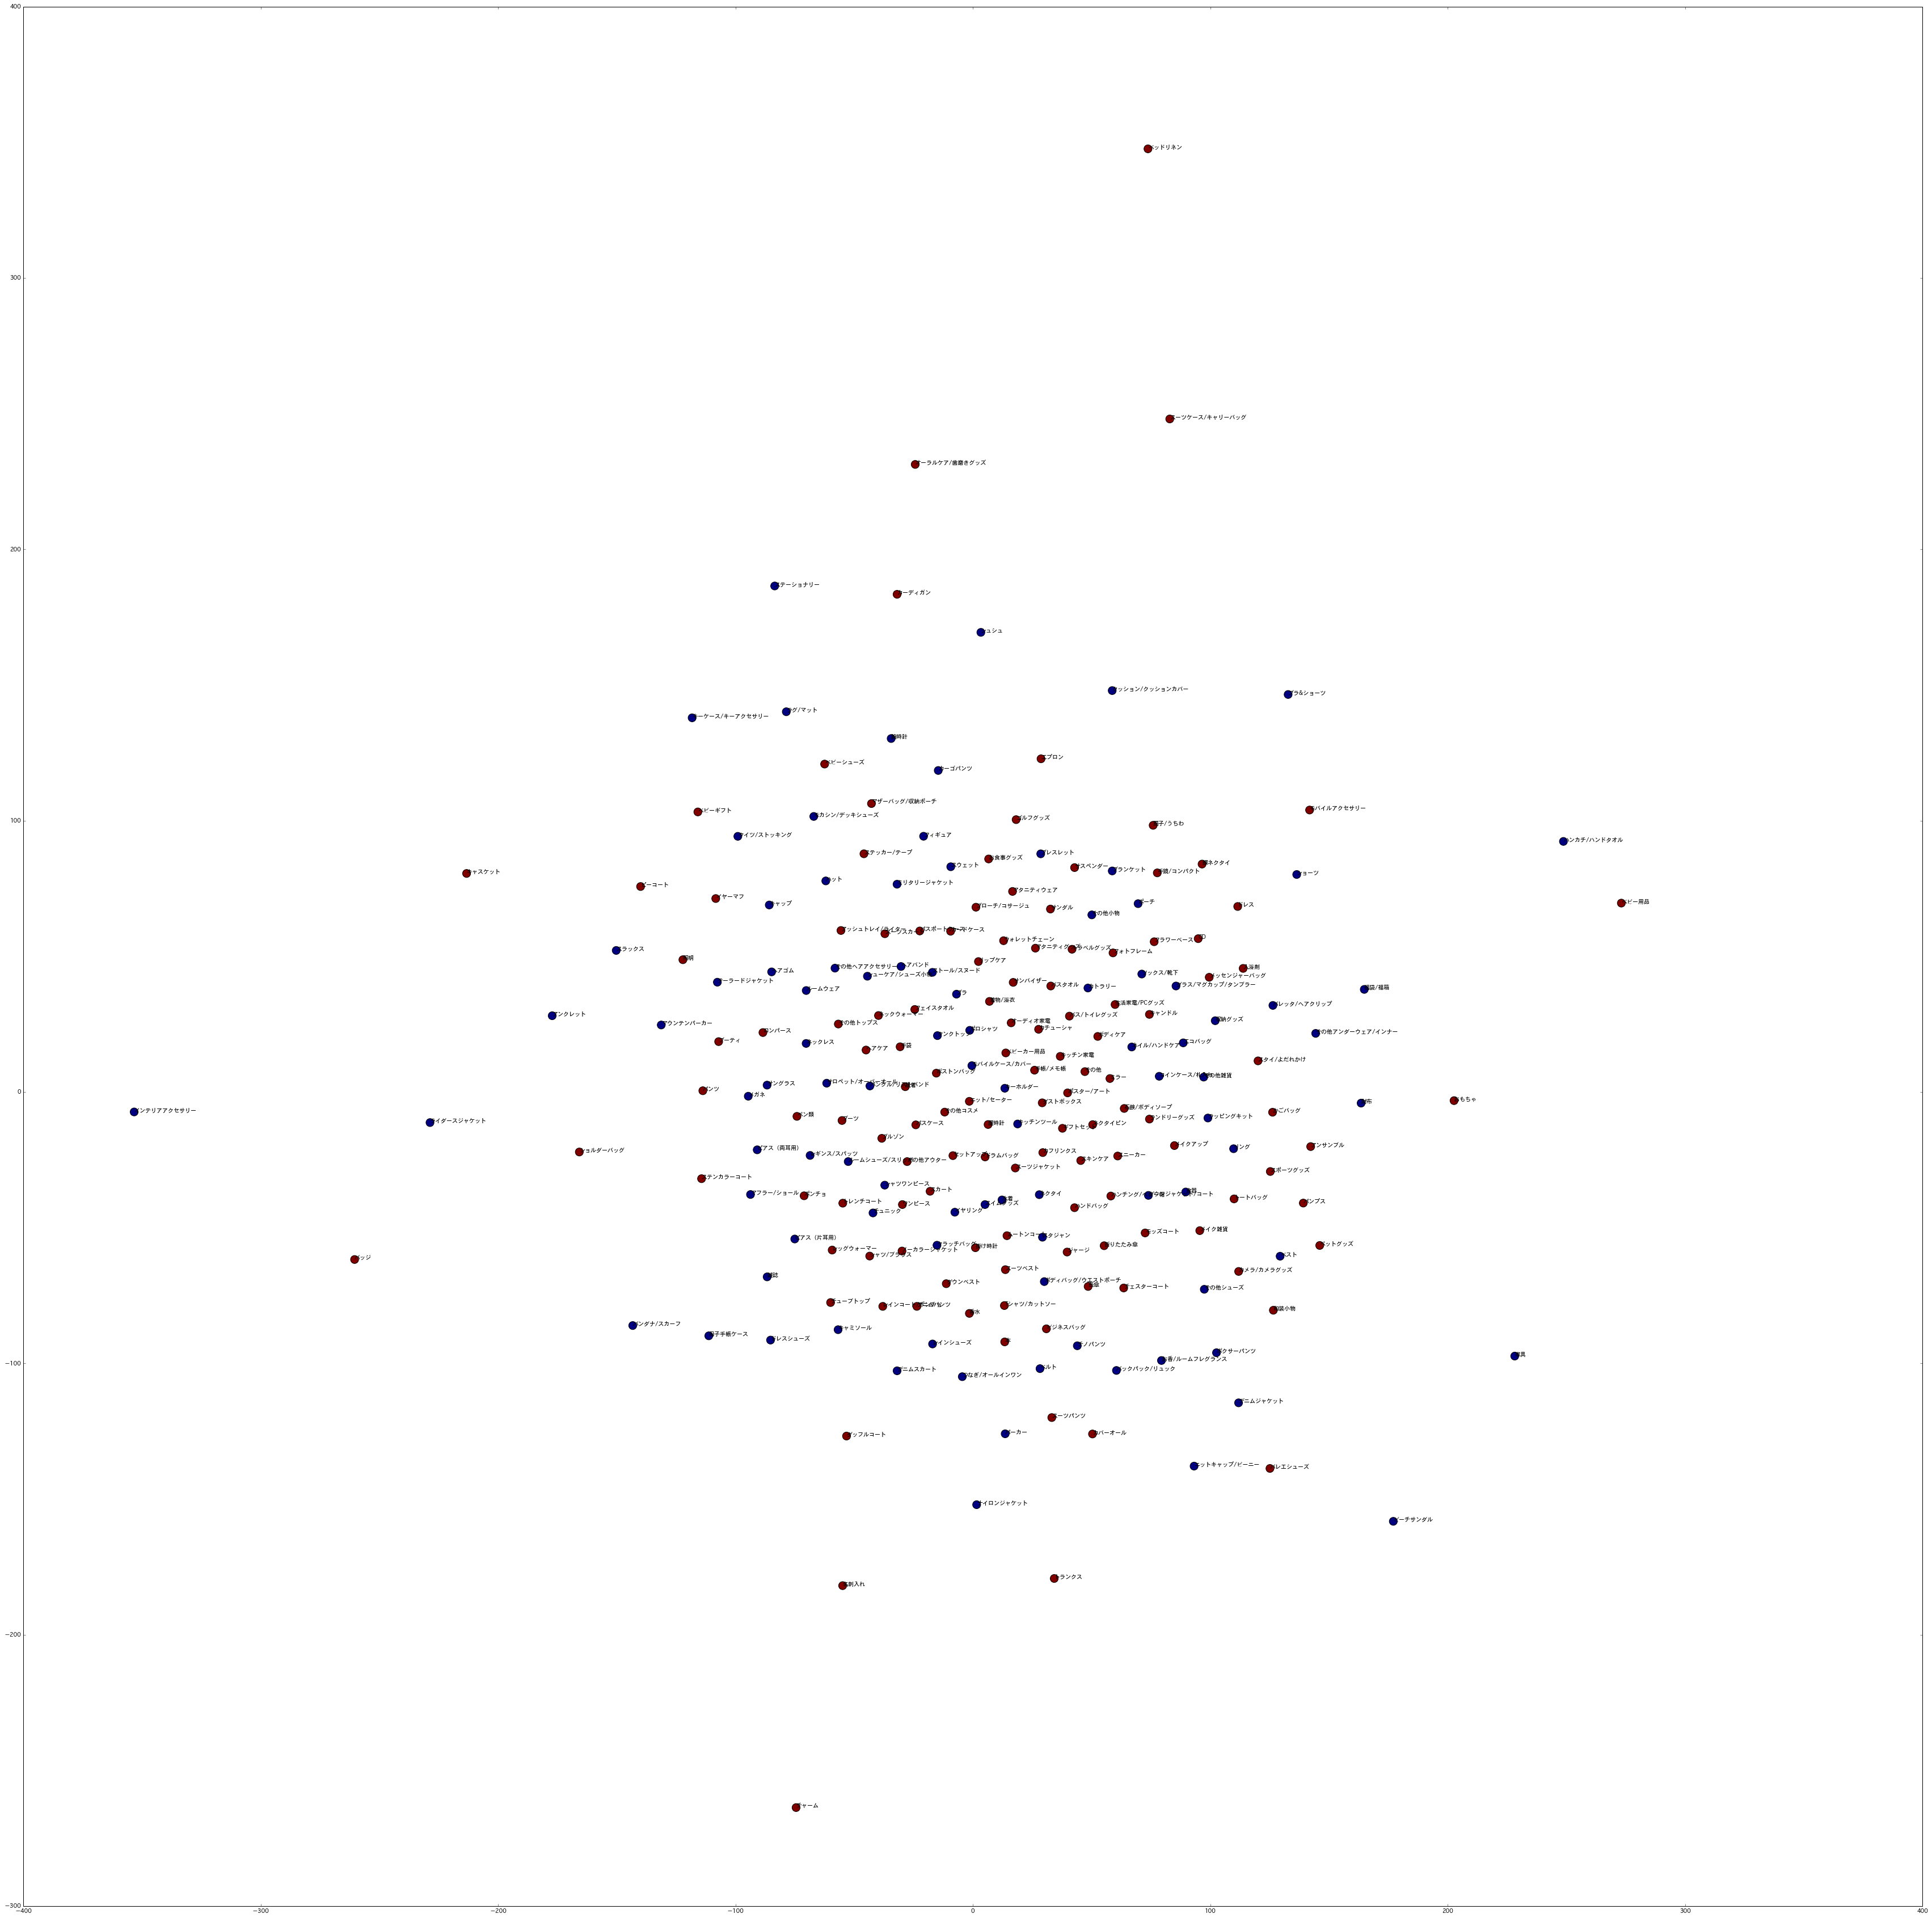

In [60]:
from sklearn.cluster import DBSCAN

model5 = DBSCAN(eps=5.0).fit(X)
labels = model5.labels_

fig = plt.figure(figsize=(60, 60))
plt.scatter(Z[:,0], Z[:,1], s=200, c=labels)
for i in range(len(categorys)):
    x = Z[i, 0]
    y = Z[i, 1]
    plt.text(x, y, categorys[i])

DBSCANならいけると思ってたけど撃沈。

### だったら階層的クラスタリングで

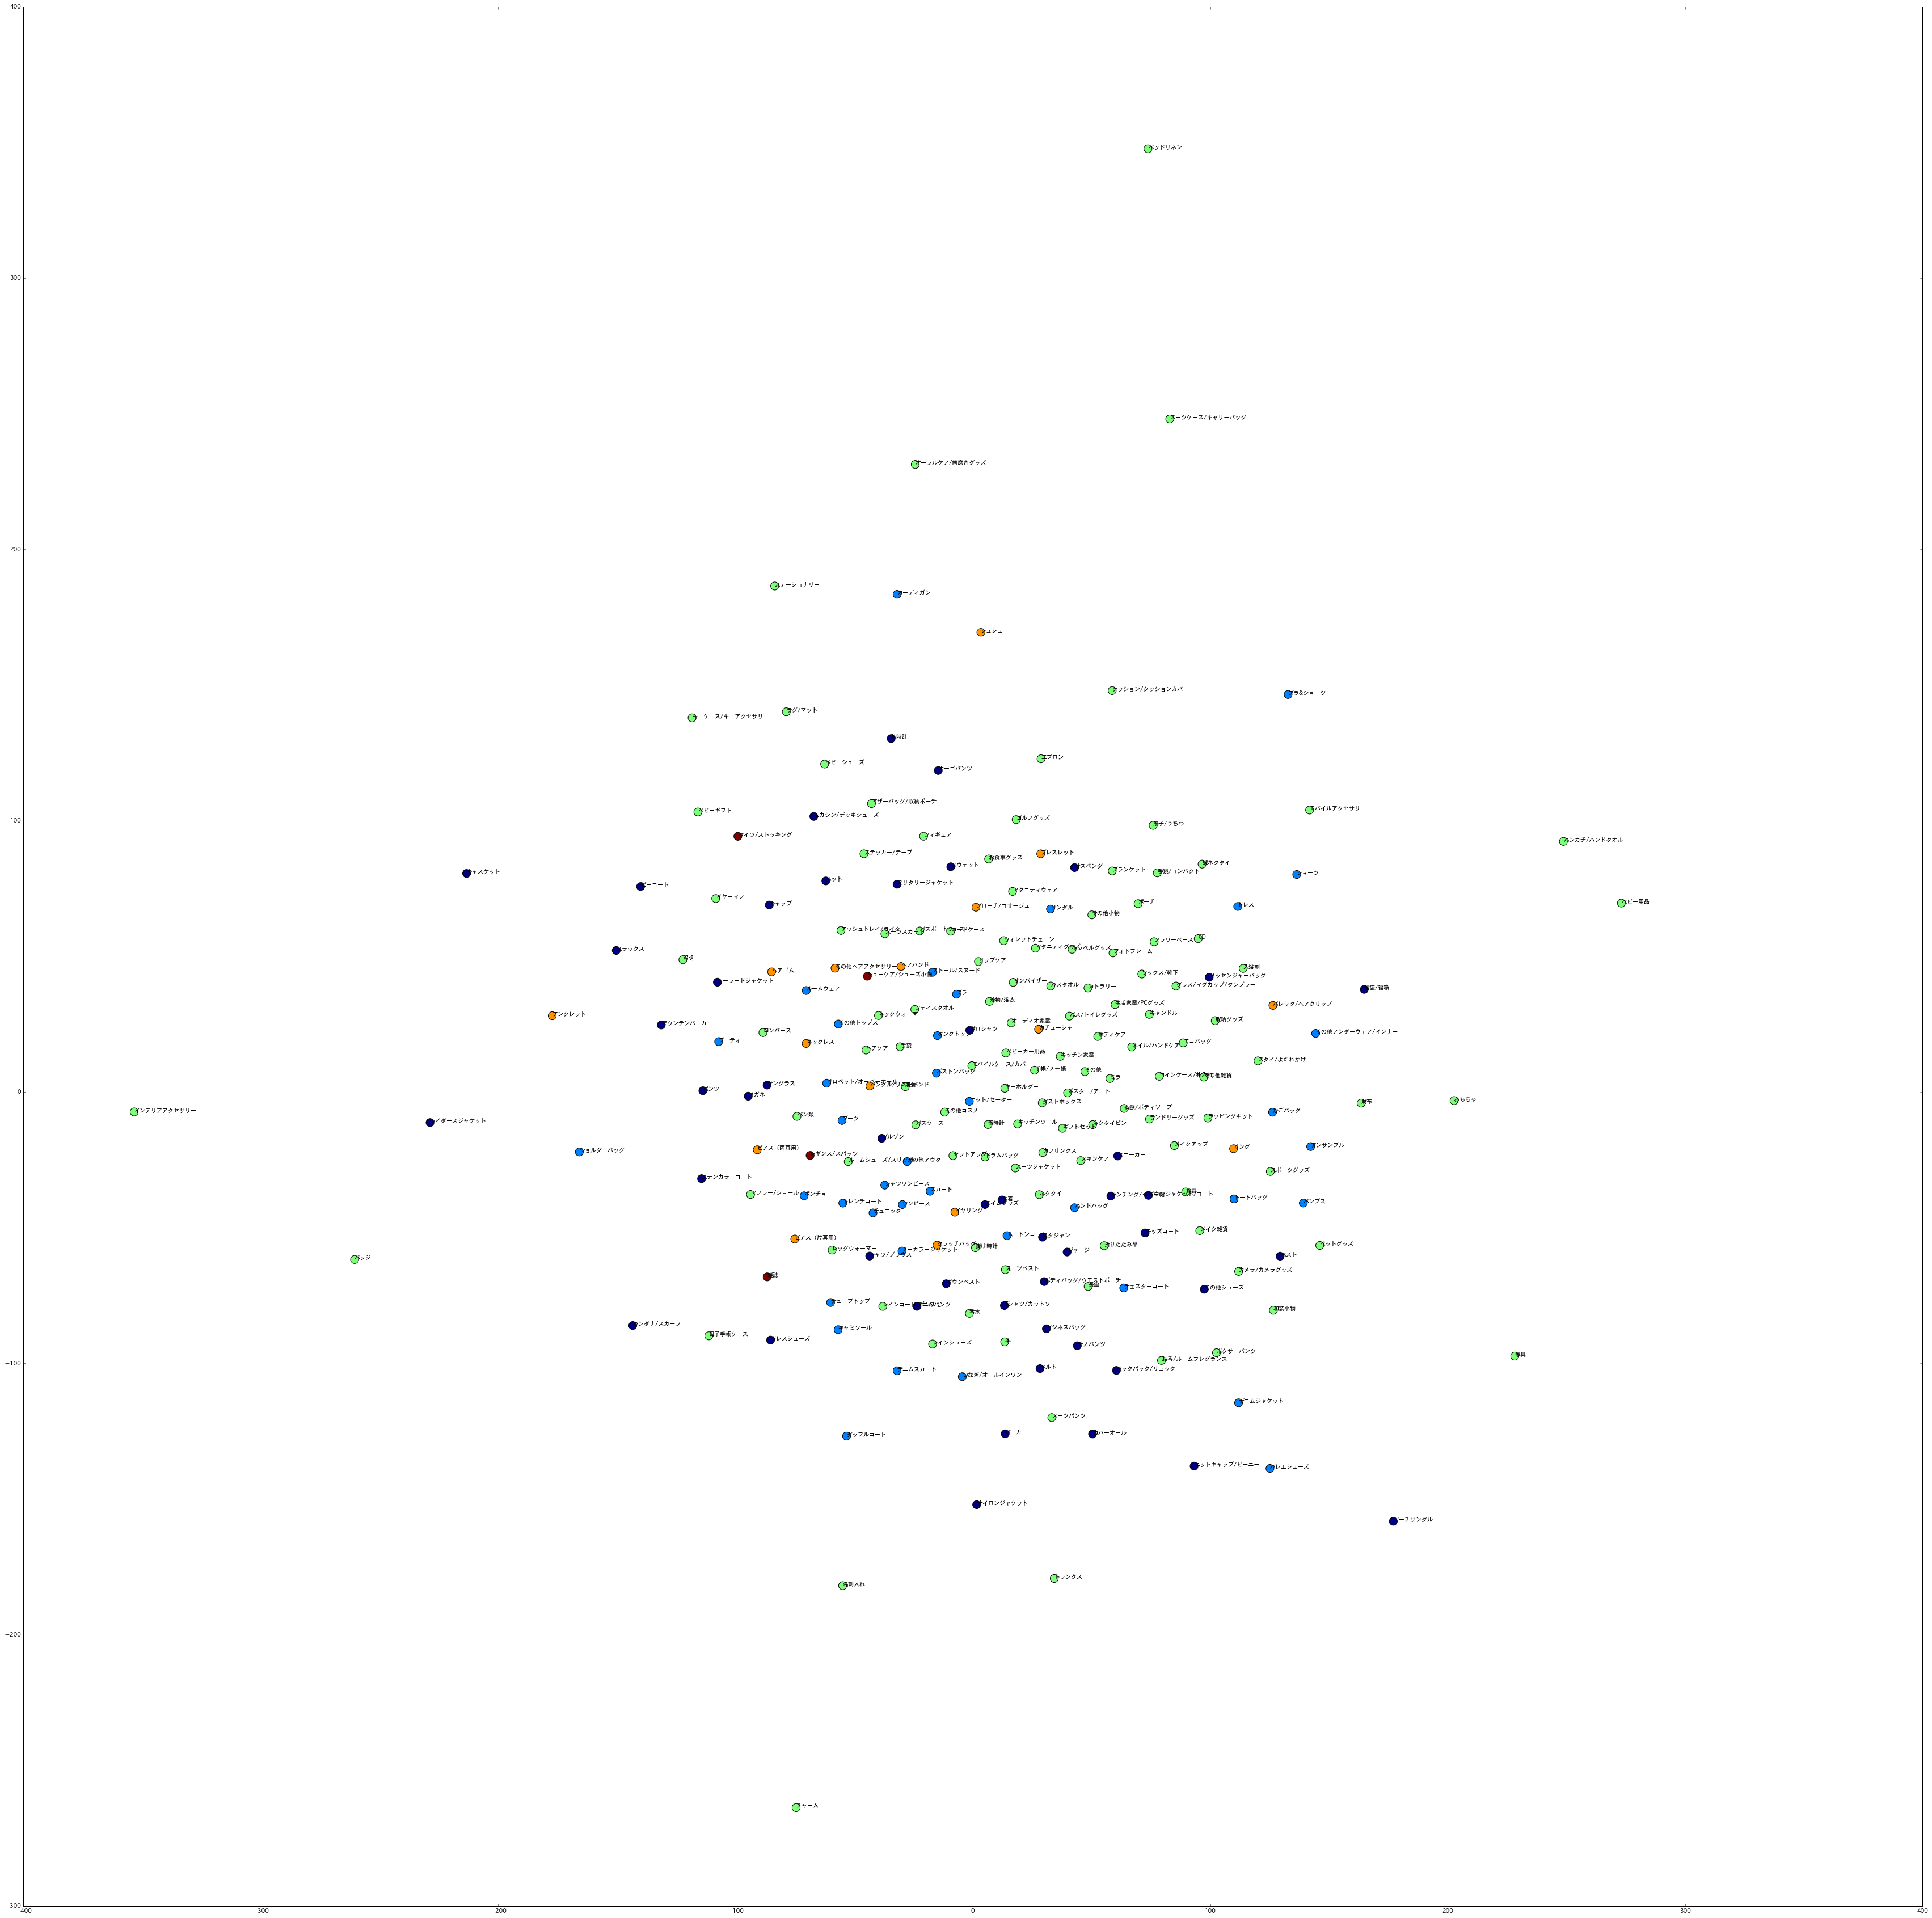

In [61]:
from sklearn.cluster import AgglomerativeClustering

model6 = AgglomerativeClustering(n_clusters=5, affinity="cosine", linkage="average").fit(X)
labels = model6.labels_

fig = plt.figure(figsize=(60, 60))
plt.scatter(Z[:,0], Z[:,1], s=200, c=labels)
for i in range(len(categorys)):
    x = Z[i, 0]
    y = Z[i, 1]
    plt.text(x, y, categorys[i])

### 結果として
なーんか、うまくいかないことがわかった。(チューニングは何もしてないけど）  
工夫の余地がありそう。